# Chap 4. Training Models

In this chapter we will dive deeper into how models are trained. We will look at 
- Closed form solution to equation
- Iteration based solution to equation (Gradient Descent and its variations)

%%latex
## Linear regression

In linear regression we generally have an equation like the following :

`y = b0 + b1\*x1 + b2\*x2`

Where -
* y : The predicted value of the target
* b : Model parameters
* x : Input variable

In matrix form the equation can be written as:

`y = b^T.X`

Let us try to write our own Linear Regression model from scratch. We will generate some data and try to go through the steps to calculate the model.

We will use the normal equation solution to calculate the linear regression model

`theta = (XT.X)^(-1).XT.Y`

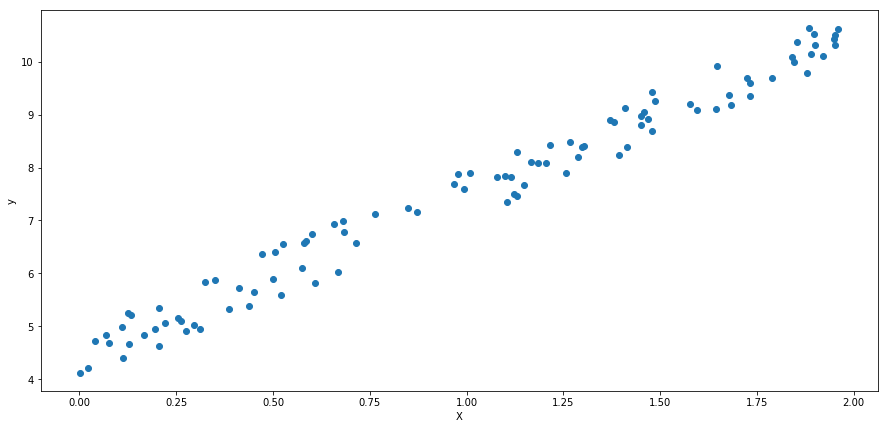

In [1]:
import numpy as np

X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100, 1)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = [15, 7])
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Now let us calculate the normal equation for Linear Regression

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[ 4.45911286],
       [ 3.0456828 ]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.45911286],
       [ 10.55047845]])

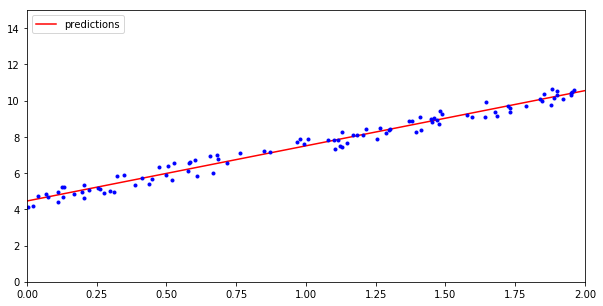

In [5]:
plt.figure(figsize=[10, 5])
plt.plot(X_new, y_predict, "r-", label = "predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend(loc = "upper left")
plt.show()

In sklearn

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.predict(X_new)

/Users/soutikchakraborty/venv/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


array([[  4.45911286],
       [ 10.55047845]])

In [7]:
lin_reg.intercept_, lin_reg.coef_

(array([ 4.45911286]), array([[ 3.0456828]]))

### Gradient Descent

Now we will try to implement gradient descent algorithm for our problem and see if it can come up with the same solution as sklearn and also closed form solution of linear regression.

In [8]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2.0/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [9]:
theta

array([[ 4.45911286],
       [ 3.0456828 ]])

This is the same as what we obtained from sklearn and our closed form solution of linear regression.

Now we will try and plot for the various learning rate values and see how our model converges.

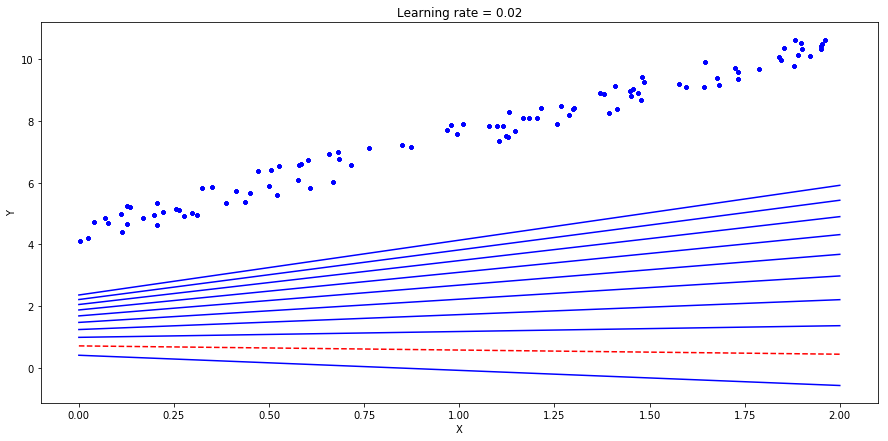

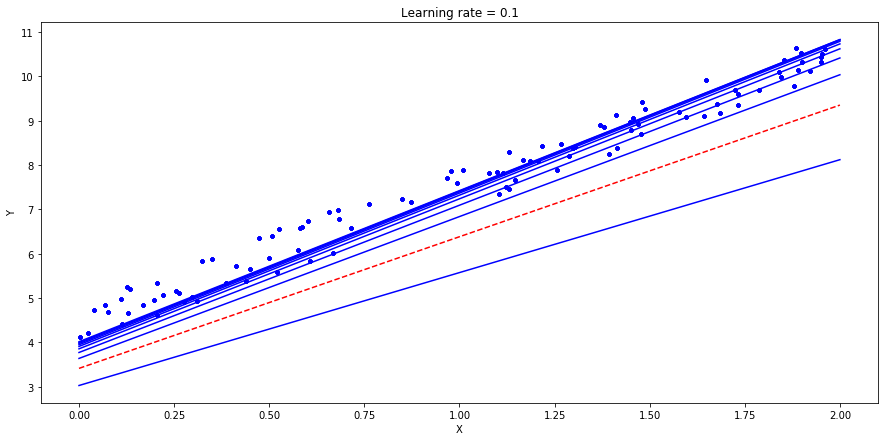

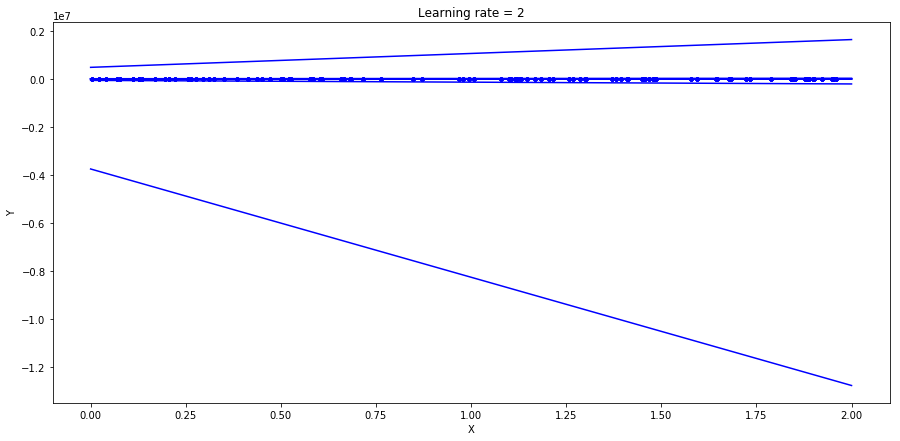

In [10]:
eta = [0.02, 0.1, 2]
n_iterations = 10
m = 100 # Number of items in X

theta = np.random.randn(2,1)  # random initialization

for learning_rate in eta:
    plt.figure(figsize=[15, 7])
    
    for iteration in range(n_iterations):
        gradients = 2.0/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients

        y_predict = X_new_b.dot(theta)

        # Plot it 
        if iteration == 1:
            plt.plot(X_new, y_predict, "r--")
        else:
            plt.plot(X_new, y_predict, "b-")
        plt.plot(X, y, "b.")
        #plt.axis([0, 2, 0, 15])

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Learning rate = %s"%(learning_rate))
    plt.show()

As we can see that with higher learning rate the model starts to diverge while with lower learning rate, the model will take a lot of time to converge to the right answer.

### Stochastic Gradient Descent

Gradient descent uses the entire data to train and can be slow computationally. On the other hand stochastic gradient descent takes a random instance in the training data and tries to find the direction and gradient using that. This method is definitely faster as the method requires manipulating less amount of data each time, but the randomness in selecting the training data helps in allowing the model to NOT settle in local minimas, it keeps bouncing around and is not smoothly decreasing the error as in gradient descent.

One solution to this is to keep lowering the learning rate as the algorithm goes through the iteration. This reduces the bouncing of the algorithm around as the learning rate is lowered in the later stages of the process.

The below code implements an example of stochastic gradient descent algorithm with a simple learning schedule.

The learning schedule is basically returing the learning rate of `(5/(t+50))` where `t = epoch*m+i`.
This will effectively lower the learning rate as we move epochs up. We will also randomize our starting values for the gradient descent in each epoch and try to converge.

In [11]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters
m = len(X_b)
np.random.seed(42)


def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[ 0.49671415],
       [-0.1382643 ]])

In [12]:
# Using Scikit learn package

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

/Users/soutikchakraborty/venv/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([ 4.45277624]), array([ 3.0397048]))

 ## Polynomial Regression
 
 In the above examples, we have used a single variable or non-power variables in our regression. Real world is not always a simple linear regression and hence we will need to make sure we also know how to fit a model with higher power variables. 
 
We will try to create a model with polynomial features below.

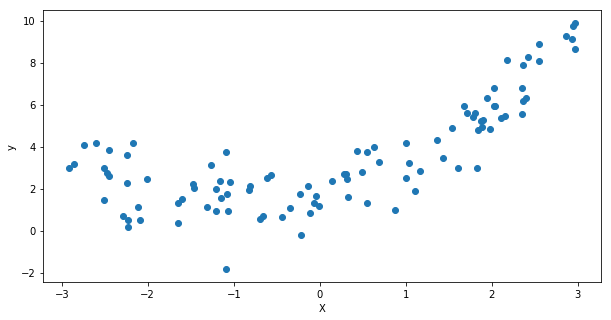

In [21]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Plot the data
plt.figure(figsize = [10, 5])
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

As we can see that a line won't fit the above data points and we will need a curve to do the same.  Below we will try to have a model that has polynomial features.

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print "Original values of X: %s"%(X[0])
print "Polynomial values of X: %s"%(X_poly[0])

Original values of X: [-0.61269495]
Polynomial values of X: [-0.61269495  0.3753951 ]


In [23]:
# Fit linear model
lin_poly = LinearRegression()
lin_poly.fit(X_poly, y.ravel())
lin_poly.intercept_, lin_poly.coef_

(1.7503026537824586, array([ 0.9594138 ,  0.53169388]))

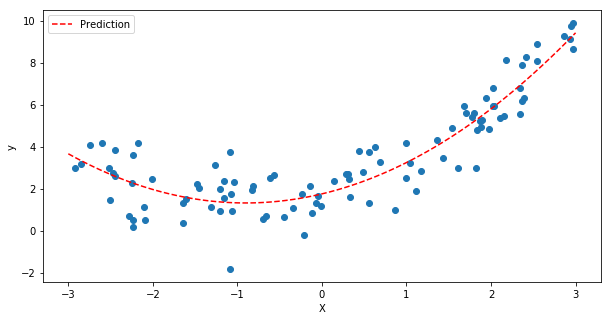

In [36]:
# Predict new data
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_poly.predict(X_new_poly)

# Plot the data
plt.figure(figsize = [10, 5])
plt.scatter(X, y)
plt.plot(X_new, y_new, "r--", label = "Prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc = "upper left")
plt.show()

As we can see our polynomial regressor fits the curve perfectly and is a good model for the data points

## Regularized Regression

Now we will quickly look into regularized regression techniques - Ridge and Lasso. These techniques will help us reduce variance as wanted using a regularization parameter (alpha). As alpha is increased towards 1 the regression will become a straight line across the mean of the data points. As alpha approaches towards 0 the model has a lot of variance -- this means that the regression line will try to go across all the points and will end up all curvy and wobbly across the data points

### Ridge Regression

Below we will see an example of ridge regression.

In [38]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

In [39]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 0.2)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 1.55296191]])

### Lasso Regression

In [40]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.2)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 1.52220506])

In [41]:
# Compare to Stochastic Gradient Descent
sgd_reg = SGDRegressor()
sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

/Users/soutikchakraborty/venv/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/soutikchakraborty/venv/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 1.13731404])